### Load and filter the data by comments

In [179]:
import pandas as pd
from tabulate import tabulate

# Load the Excel file
file_path = "C:/Users/nirko/Dropbox/Civil Servants' Perceptions of Democratic Decline/Data/data with comments/data_for_analysis_extended_with_comments.xlsx"
df = pd.read_excel(file_path)

# Load the csv file
file_path = "C:/Users/nirko/Dropbox/Civil Servants' Perceptions of Democratic Decline/Data/data with comments/data_for_analysis_senior.xlsx"
df_senior = pd.read_excel(file_path)

### Filter DF according to Middle and Senior Civil Servants found in data_for_senior_analysis

In [205]:
# Filter df based on the IDs in df_senior
filtered_df = df[df['ResponseId'].isin(df_senior['ResponseId'])]


In [248]:
#1. Word Counts for Each Comment Field
word_counts = filtered_df[comment_columns].apply(lambda x: x.str.split().str.len(), axis=0)
#2. Summing Word Counts Across Comment Fields
total_word_counts = word_counts.sum(axis=1)
#3. Filtering Respondents with More Than 3 Words
filtered_word_counts = total_word_counts[total_word_counts > 3]


### Histogram of word counts distribution (only open comments with 4 or more words considered)

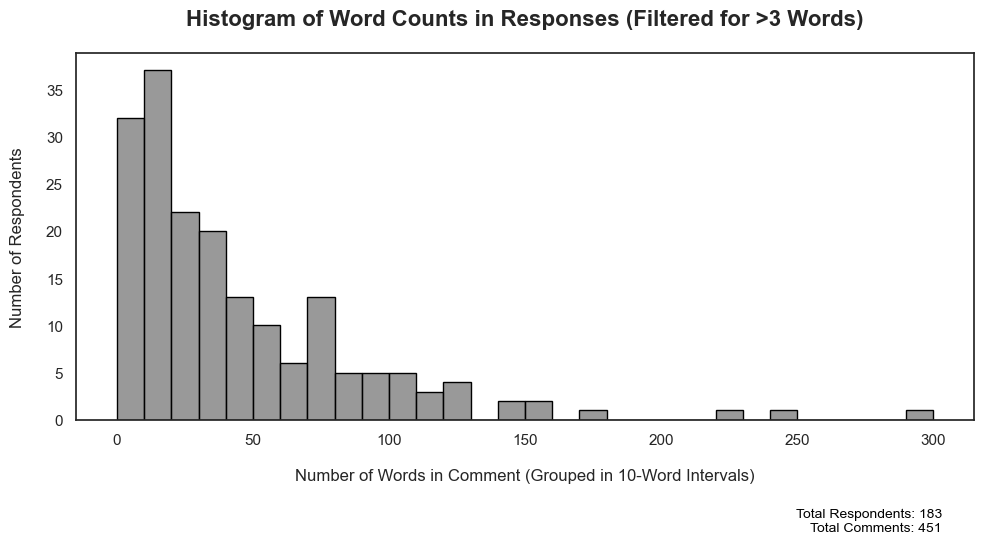

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_theme(style="white")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_word_counts, bins=range(0, int(filtered_word_counts.max()) + 10, 10), kde=False, color="gray", edgecolor="black", alpha=0.8)

# Add titles and labels
plt.title("Histogram of Word Counts in Responses (Filtered for >3 Words)", fontsize=16, weight="bold", pad=20)
plt.xlabel("Number of Words in Comment (Grouped in 10-Word Intervals)", fontsize=12, labelpad=15)
plt.ylabel("Number of Respondents", fontsize=12, labelpad=15)

# Adjust layout to make space for external text
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space below the plot for the text

# Add the total respondent and comment counts outside the plot
plt.figtext(
    0.95, 0.1,  # X and Y coordinates (relative to figure, not axes)
    f"Total Respondents: {total_respondents}\nTotal Comments: {comments_in_histogram}",
    fontsize=10,
    color="black",
    ha="right",  # Align text to the right
)

# Show the plot
plt.show()


### Create two groups: Respondents who answered at least one open question and One of those who did not answer any


In [250]:
# Columns representing comments
comment_columns = [
    "Q6_influence_comments",
    "Q12_politicization_comments",
    "Q21_a_effort_comments",
    "Q24_voice_comments",
    "Q17_backsliding_comments",
    "Q27_exit_comments",
    "Q29_exit_subtoage_voice_scenario_comments",
    "Q44_general_comments_about_the_survey"
]

# Calculate the word count for each comment column
word_counts = filtered_df[comment_columns].apply(lambda x: x.str.split().str.len(), axis=0)

# Identify respondents with at least one comment above 3 words
with_comments_condition = word_counts.gt(3).any(axis=1)

# Identify respondents with no comment above 3 words
without_comments_condition = ~with_comments_condition

# Filter respondents with at least one comment above 3 words
with_comments = filtered_df[with_comments_condition]

# Filter respondents with no comment above 3 words
without_comments = filtered_df[without_comments_condition]

# Count the respondents in each group
with_comments_count = len(with_comments)
without_comments_count = len(without_comments)

# Display results
print(f"Number of respondents with at least one comment above 3 words: {with_comments_count}")
print(f"Number of respondents with no comments or all comments 3 words or fewer: {without_comments_count}")

Number of respondents with at least one comment above 3 words: 183
Number of respondents with no comments or all comments 3 words or fewer: 211


### Describe these groups statisticsally: all civil servants

In [251]:
import pandas as pd

# Initialize a dictionary to store contingency tables
contingency_tables = {}

# Define variables to analyze
variables = ["gender", "age", "tenure", "ministry", "education", "nationality", "religiosity"]

# Iterate through variables and create contingency tables
for var in variables:
    # Ensure the variable exists in the dataset
    if var not in filtered_df.columns:
        print(f"Variable '{var}' not found in filtered_df. Skipping.")
        continue
    
    # Create a contingency table
    contingency_table = pd.crosstab(filtered_df[var], filtered_df.index.isin(with_comments.index))
    
    # Add percentages
    percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    contingency_table_with_percentages = pd.concat(
        [contingency_table, percentages.rename(columns=lambda col: f"{col}_percent")], axis=1
    )
    
    # Store the table for preview
    contingency_tables[var] = contingency_table_with_percentages

# Print a preview of each contingency table with better formatting
for var, table in contingency_tables.items():
    print(f"\nContingency Table for {var}:")
    print("Note: 'False' represents respondents who did NOT provide any comments, "
          "'True' represents respondents who provided at least one comment.")
    print(tabulate(table, headers='keys', tablefmt='grid'))


Contingency Table for gender:
Note: 'False' represents respondents who did NOT provide any comments, 'True' represents respondents who provided at least one comment.
+----------+---------+--------+-----------------+----------------+
| gender   |   False |   True |   False_percent |   True_percent |
+==========+=========+========+=================+================+
| female   |     111 |    106 |         51.1521 |        48.8479 |
+----------+---------+--------+-----------------+----------------+
| male     |     100 |     77 |         56.4972 |        43.5028 |
+----------+---------+--------+-----------------+----------------+

Contingency Table for age:
Note: 'False' represents respondents who did NOT provide any comments, 'True' represents respondents who provided at least one comment.
+-------+---------+--------+-----------------+----------------+
| age   |   False |   True |   False_percent |   True_percent |
+=======+=========+========+=================+================+
| 20-30 


Contingency Table for age:
Note: 'False' represents respondents who did NOT provide any comments, 'True' represents respondents who provided at least one comment.
+-------+---------+--------+-----------------+----------------+
| age   |   False |   True |   False_percent |   True_percent |
+=======+=========+========+=================+================+
| 20-30 |      11 |      4 |         73.3333 |        26.6667 |
+-------+---------+--------+-----------------+----------------+
| 31-40 |      72 |     60 |         54.5455 |        45.4545 |
+-------+---------+--------+-----------------+----------------+
| 41-50 |      67 |     70 |         48.9051 |        51.0949 |
+-------+---------+--------+-----------------+----------------+
| 51-60 |      25 |     37 |         40.3226 |        59.6774 |
+-------+---------+--------+-----------------+----------------+
| 61+   |       5 |      7 |         41.6667 |        58.3333 |
+-------+---------+--------+-----------------+----------------+

Con

### Check Chi-square

In [233]:
import pandas as pd
from scipy.stats import chi2_contingency

# Initialize results and contingency tables
statistical_results = []
contingency_tables = {}

# Variables to analyze
variables = ["age", "gender", "tenure", "ministry", "education", "nationality", "religiosity"]

for var in variables:
    # Ensure the variable exists in the dataset
    if var not in filtered_df.columns:
        print(f"Variable '{var}' not found in filtered_df. Skipping.")
        continue
    
    # Create a contingency table
    contingency_table = pd.crosstab(filtered_df[var], filtered_df.index.isin(with_comments.index))
    
    # Perform chi-square test
    try:
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Add results to the statistical results list
        statistical_results.append({
            "Variable": var,
            "Test": "Chi-square",
            "Statistic": chi2,
            "p-value": p,
            "Significant": p < 0.05
        })
    except ValueError as e:
        print(f"Skipping Chi-square test for {var} due to insufficient data: {e}")
        continue
    
    # Add percentages to the contingency table
    percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    contingency_table_with_percentages = pd.concat(
        [contingency_table, percentages.rename(columns=lambda col: f"{col}_percent")], axis=1
    )
    
    # Store the contingency table with percentages
    contingency_tables[var] = contingency_table_with_percentages

# Convert results to a DataFrame
results_df = pd.DataFrame(statistical_results)

# Print statistical test results
print("\nStatistical Test Results:")
print(results_df)



Statistical Test Results:
      Variable        Test  Statistic   p-value  Significant
0          age  Chi-square   7.068231  0.132326        False
1       gender  Chi-square   0.915136  0.338755        False
2       tenure  Chi-square   7.054000  0.133062        False
3     ministry  Chi-square  24.187159  0.565264        False
4    education  Chi-square   4.453562  0.348089        False
5  nationality  Chi-square   0.269793  0.603470        False
6  religiosity  Chi-square   4.057179  0.541213        False


In [234]:
import pandas as pd
from scipy.stats import ttest_ind

# Extract BACKSLIDING_2 values for both groups
backsliding_with_comments = with_comments['BACKSLIDING_2'].dropna()
backsliding_no_comments = no_comments['BACKSLIDING_2'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(backsliding_with_comments, backsliding_no_comments, equal_var=False)

# Print the results
print("T-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("There is a significant difference in BACKSLIDING_2 between the two groups.")
else:
    print("There is no significant difference in BACKSLIDING_2 between the two groups.")


T-test results:
T-statistic: 1.6867073757081064
P-value: 0.0926943495943397
There is no significant difference in BACKSLIDING_2 between the two groups.


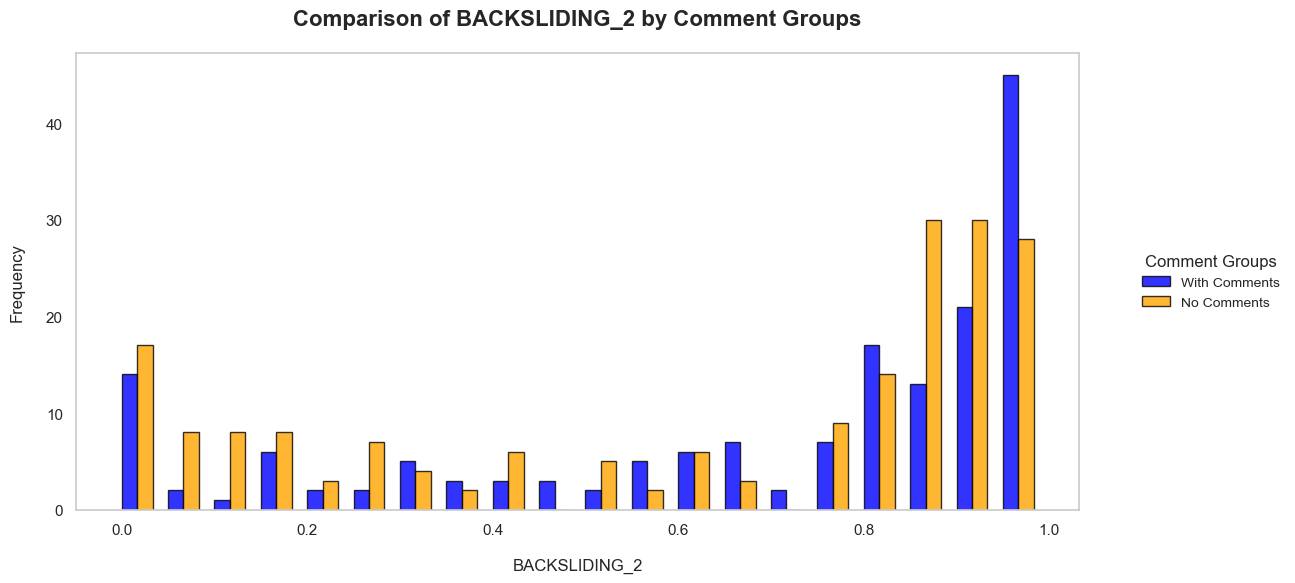

In [283]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure
plt.figure(figsize=(10, 6))

# Define the bins
bins = np.linspace(0, 1, 21)  # Creates 20 evenly spaced bins from 0 to 1

# Plot the histograms side by side without overlapping
bar_width = (bins[1] - bins[0]) / 3  # Adjust bar width to avoid overlap
plt.bar(
    bins[:-1],  # Left bin edges for group 1
    np.histogram(with_comments['BACKSLIDING_2'], bins=bins)[0],  # Heights for group 1
    width=bar_width,
    align='edge',
    color="blue",
    label="With Comments",
    alpha=0.8,
    edgecolor="black"
)
plt.bar(
    bins[:-1] + bar_width,  # Shifted bin edges for group 2
    np.histogram(without_comments['BACKSLIDING_2'], bins=bins)[0],  # Heights for group 2
    width=bar_width,
    align='edge',
    color="orange",
    label="No Comments",
    alpha=0.8,
    edgecolor="black"
)

# Add titles and labels
plt.title("Comparison of BACKSLIDING_2 by Comment Groups", fontsize=16, weight="bold", pad=20)
plt.xlabel("BACKSLIDING_2", fontsize=12, labelpad=15)
plt.ylabel("Frequency", fontsize=12, labelpad=15)

# Move legend to the right of the plot
plt.legend(
    title="Comment Groups",
    fontsize=10,
    title_fontsize=12,
    loc="center left",  # Position legend to the left of its anchor point
    bbox_to_anchor=(1.05, 0.5),  # Anchor the legend to the right side of the plot
    frameon=False  # Remove legend box border
)

# Remove gridlines
plt.grid(False)

# Adjust layout to fit the legend
plt.tight_layout(rect=[0, 0, 1.3, 1])  # Leave room on the right for the legend
plt.show()
